In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

epsilon

fix fact bank fraction = 0.5

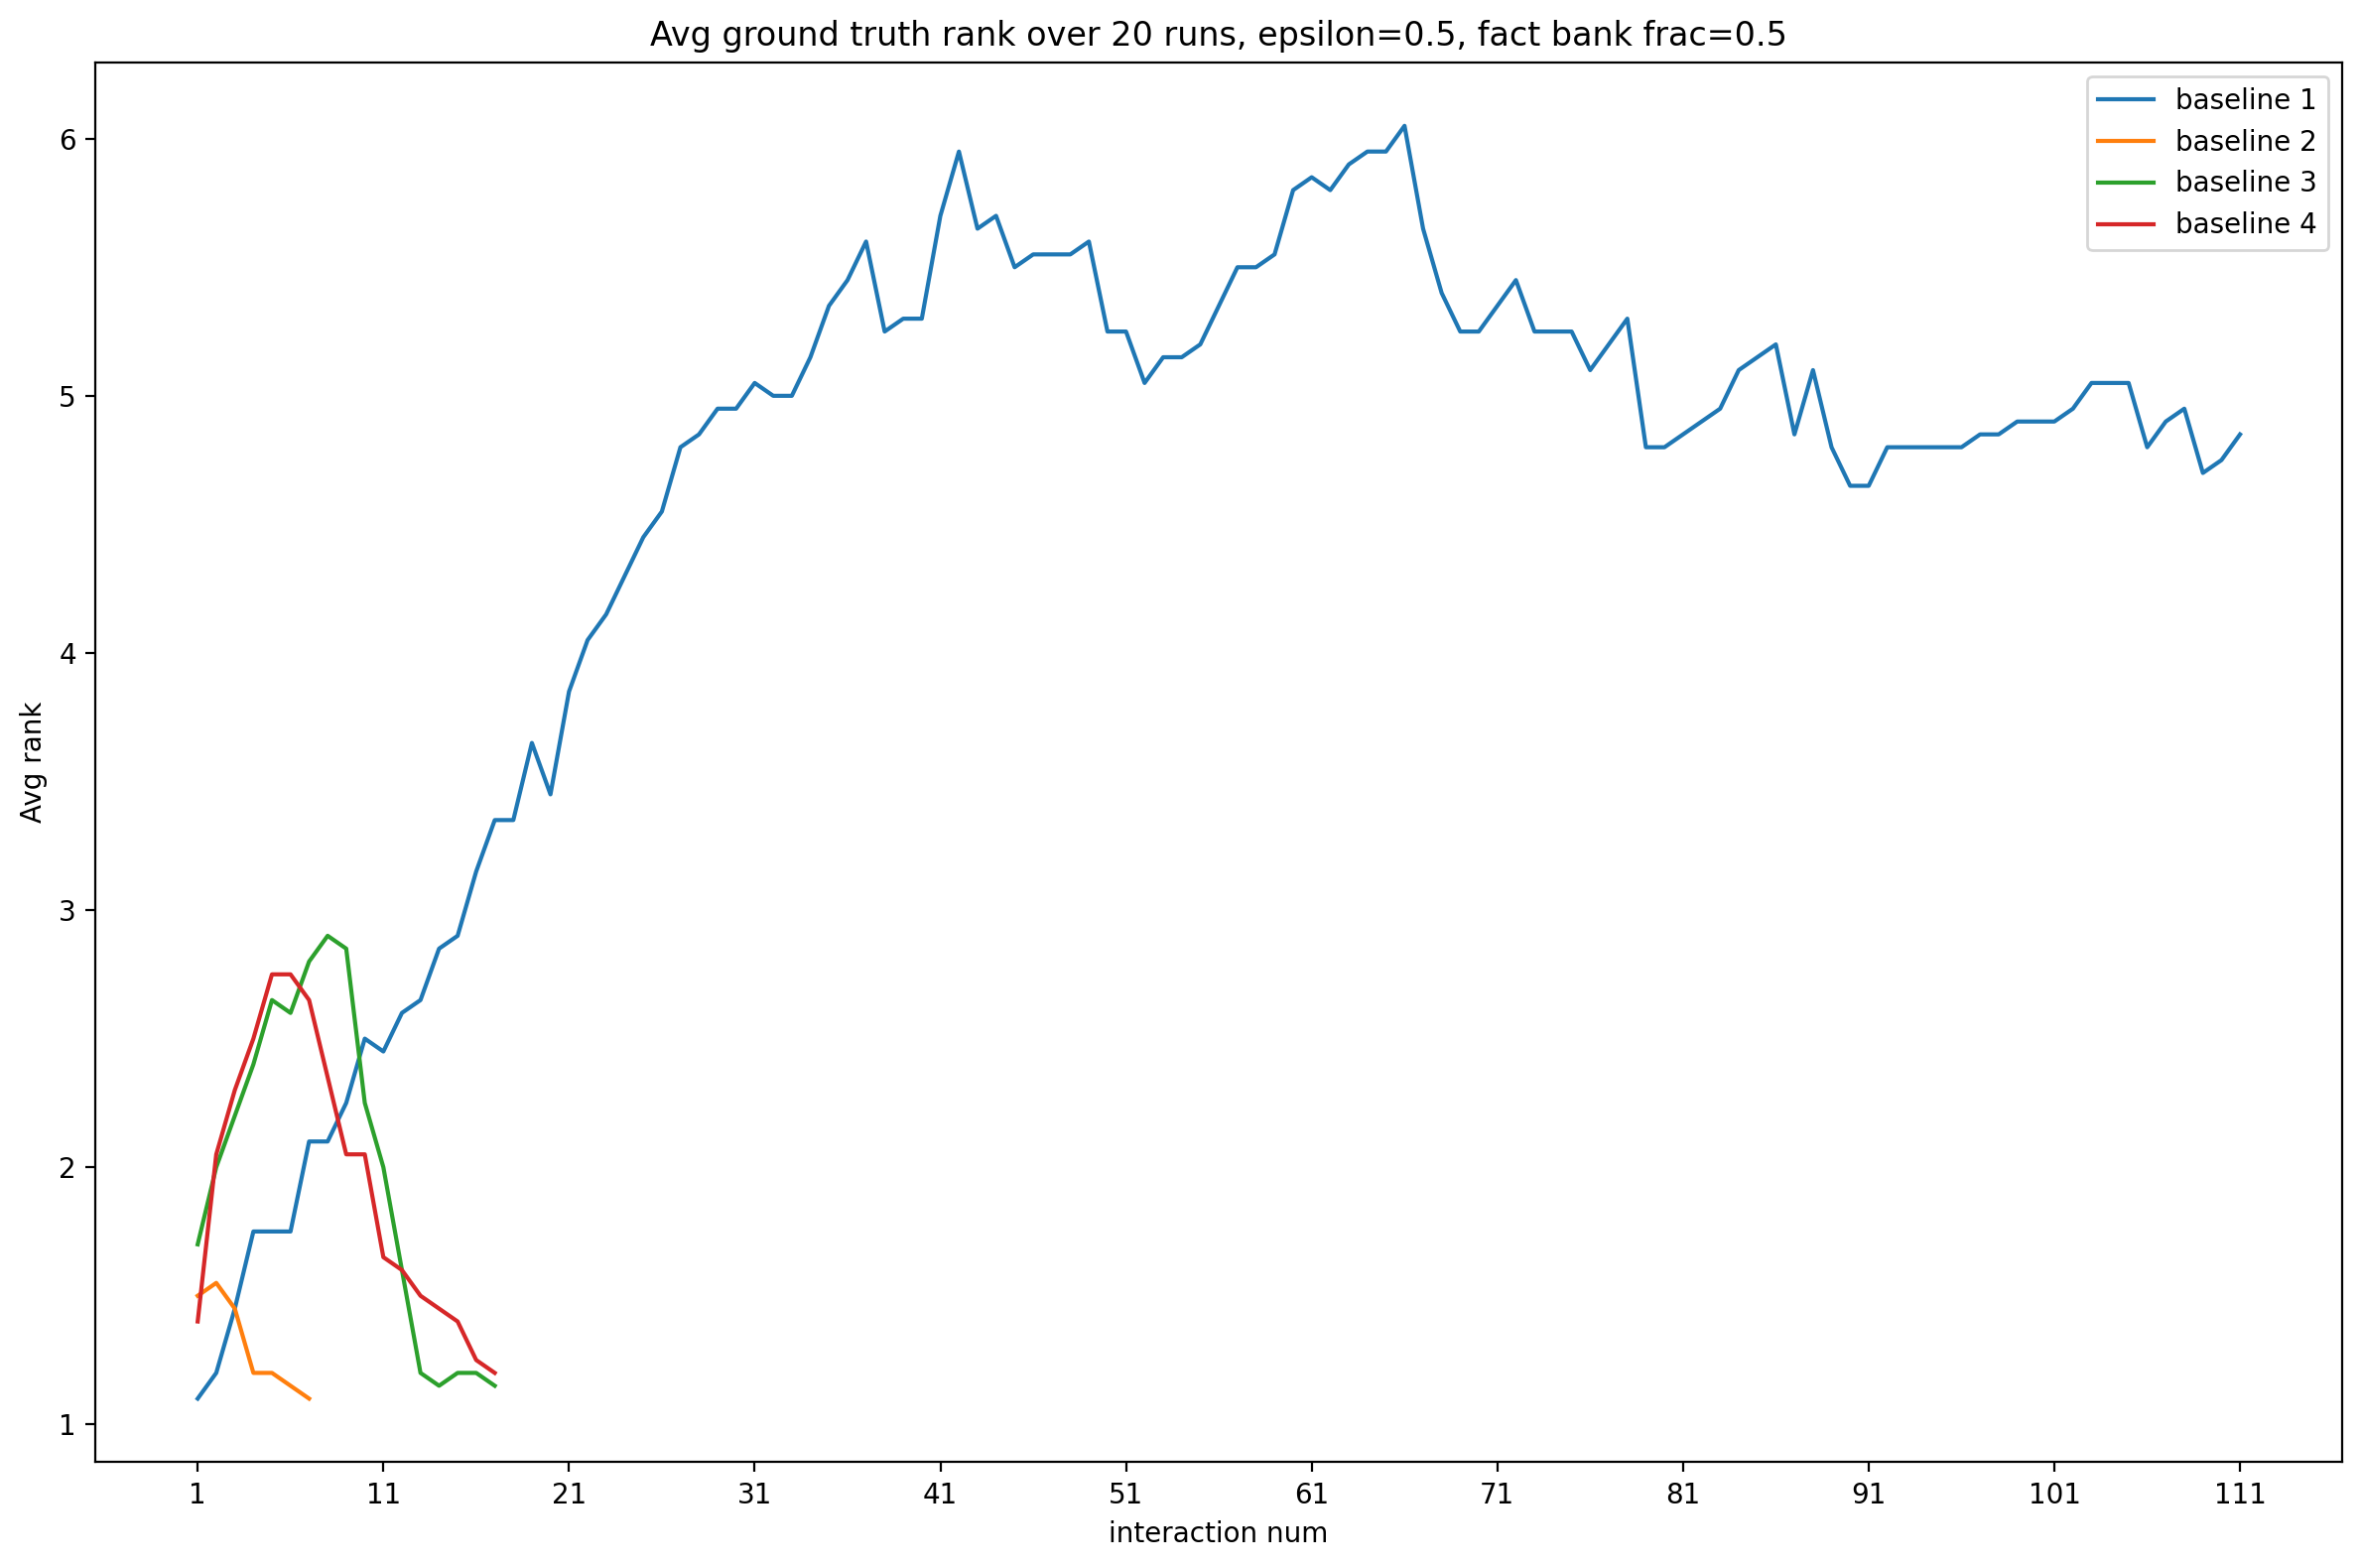

+----------------------+-------------------+---------------------+--------------------+--------------------+
|                      |    baseline 1     |     baseline 2      |     baseline 3     |     baseline 4     |
+----------------------+-------------------+---------------------+--------------------+--------------------+
|      num views       |        105        |          5          |         13         |         13         |
|      4c time(s)      | 94.74149012565613 | 0.40916919708251953 | 0.6863789558410645 | 0.7089169025421143 |
| presentation time(s) | 9.607042670249939 | 0.5142347812652588  | 0.9510329723358154 | 0.9153167963027954 |
+----------------------+-------------------+---------------------+--------------------+--------------------+


In [35]:
labels = ["baseline 1", "baseline 2", "baseline 3", "baseline 4"]

avg_ground_truth_rank_by_baseline = []
avg_time_by_baseline = ["presentation time(s)"]

max_num_interactions = -1
num_runs = 0

epsilon = 0.5

for i in range(len(labels)):
    dir_path = "./presentation_plots/result" + str(i+1) + "/"
    result_by_epsilon = np.load(dir_path + "result_by_epsilon.npy")
    time_by_epsilon = np.load(dir_path + "time_by_epsilon.npy")

    epsilon_index = int(epsilon*10-1)
    ground_truth_rank_epsilon = result_by_epsilon[epsilon_index]
    avg_ground_truth_rank = np.mean(ground_truth_rank_epsilon, axis=0)
    avg_ground_truth_rank_by_baseline.append(avg_ground_truth_rank)

    time_epsilon = time_by_epsilon[epsilon_index]
    avg_time = np.mean(time_epsilon, axis=0)
    avg_time_by_baseline.append(avg_time)

    if avg_ground_truth_rank.size > max_num_interactions:
        max_num_interactions = avg_ground_truth_rank.size

    num_runs = ground_truth_rank_epsilon.shape[0]

x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_baseline[i]
    if y.size < max_num_interactions:
        y = np.concatenate((y, np.full(max_num_interactions - y.size, np.nan)))
    ax.plot(x_axis, y, label=labels[i])
ax.legend()
ax.set_title("Avg ground truth rank over " + str(num_runs) + " runs, epsilon=" + str(epsilon) + ", fact bank frac=0.5")
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./presentation_plots/avg_rank_epsilon")
plt.close(fig)

# 4C --- 94.74149012565613 seconds ---
# 4C --- 0.40916919708251953 seconds ---
# 4C --- 0.6863789558410645 seconds ---
# 4C --- 0.7089169025421143 seconds ---
from tabulate import tabulate
time_4c = ["4c time(s)", 94.74149012565613, 0.40916919708251953, 0.6863789558410645, 0.7089169025421143]
size = ["num views", 105, 5, 13, 13]
table = [size, time_4c, avg_time_by_baseline]
print(tabulate(table, [""] + labels, tablefmt="pretty"))

# print("4C time: ", time_4c)
# print("avg run rime: ", avg_time_by_baseline)


fact_bank_frac

fix epsilon = 0.5

fact bank = random sample of ground truth view

use the same fact bank for all 20 runs (but each run the sample generated are different)

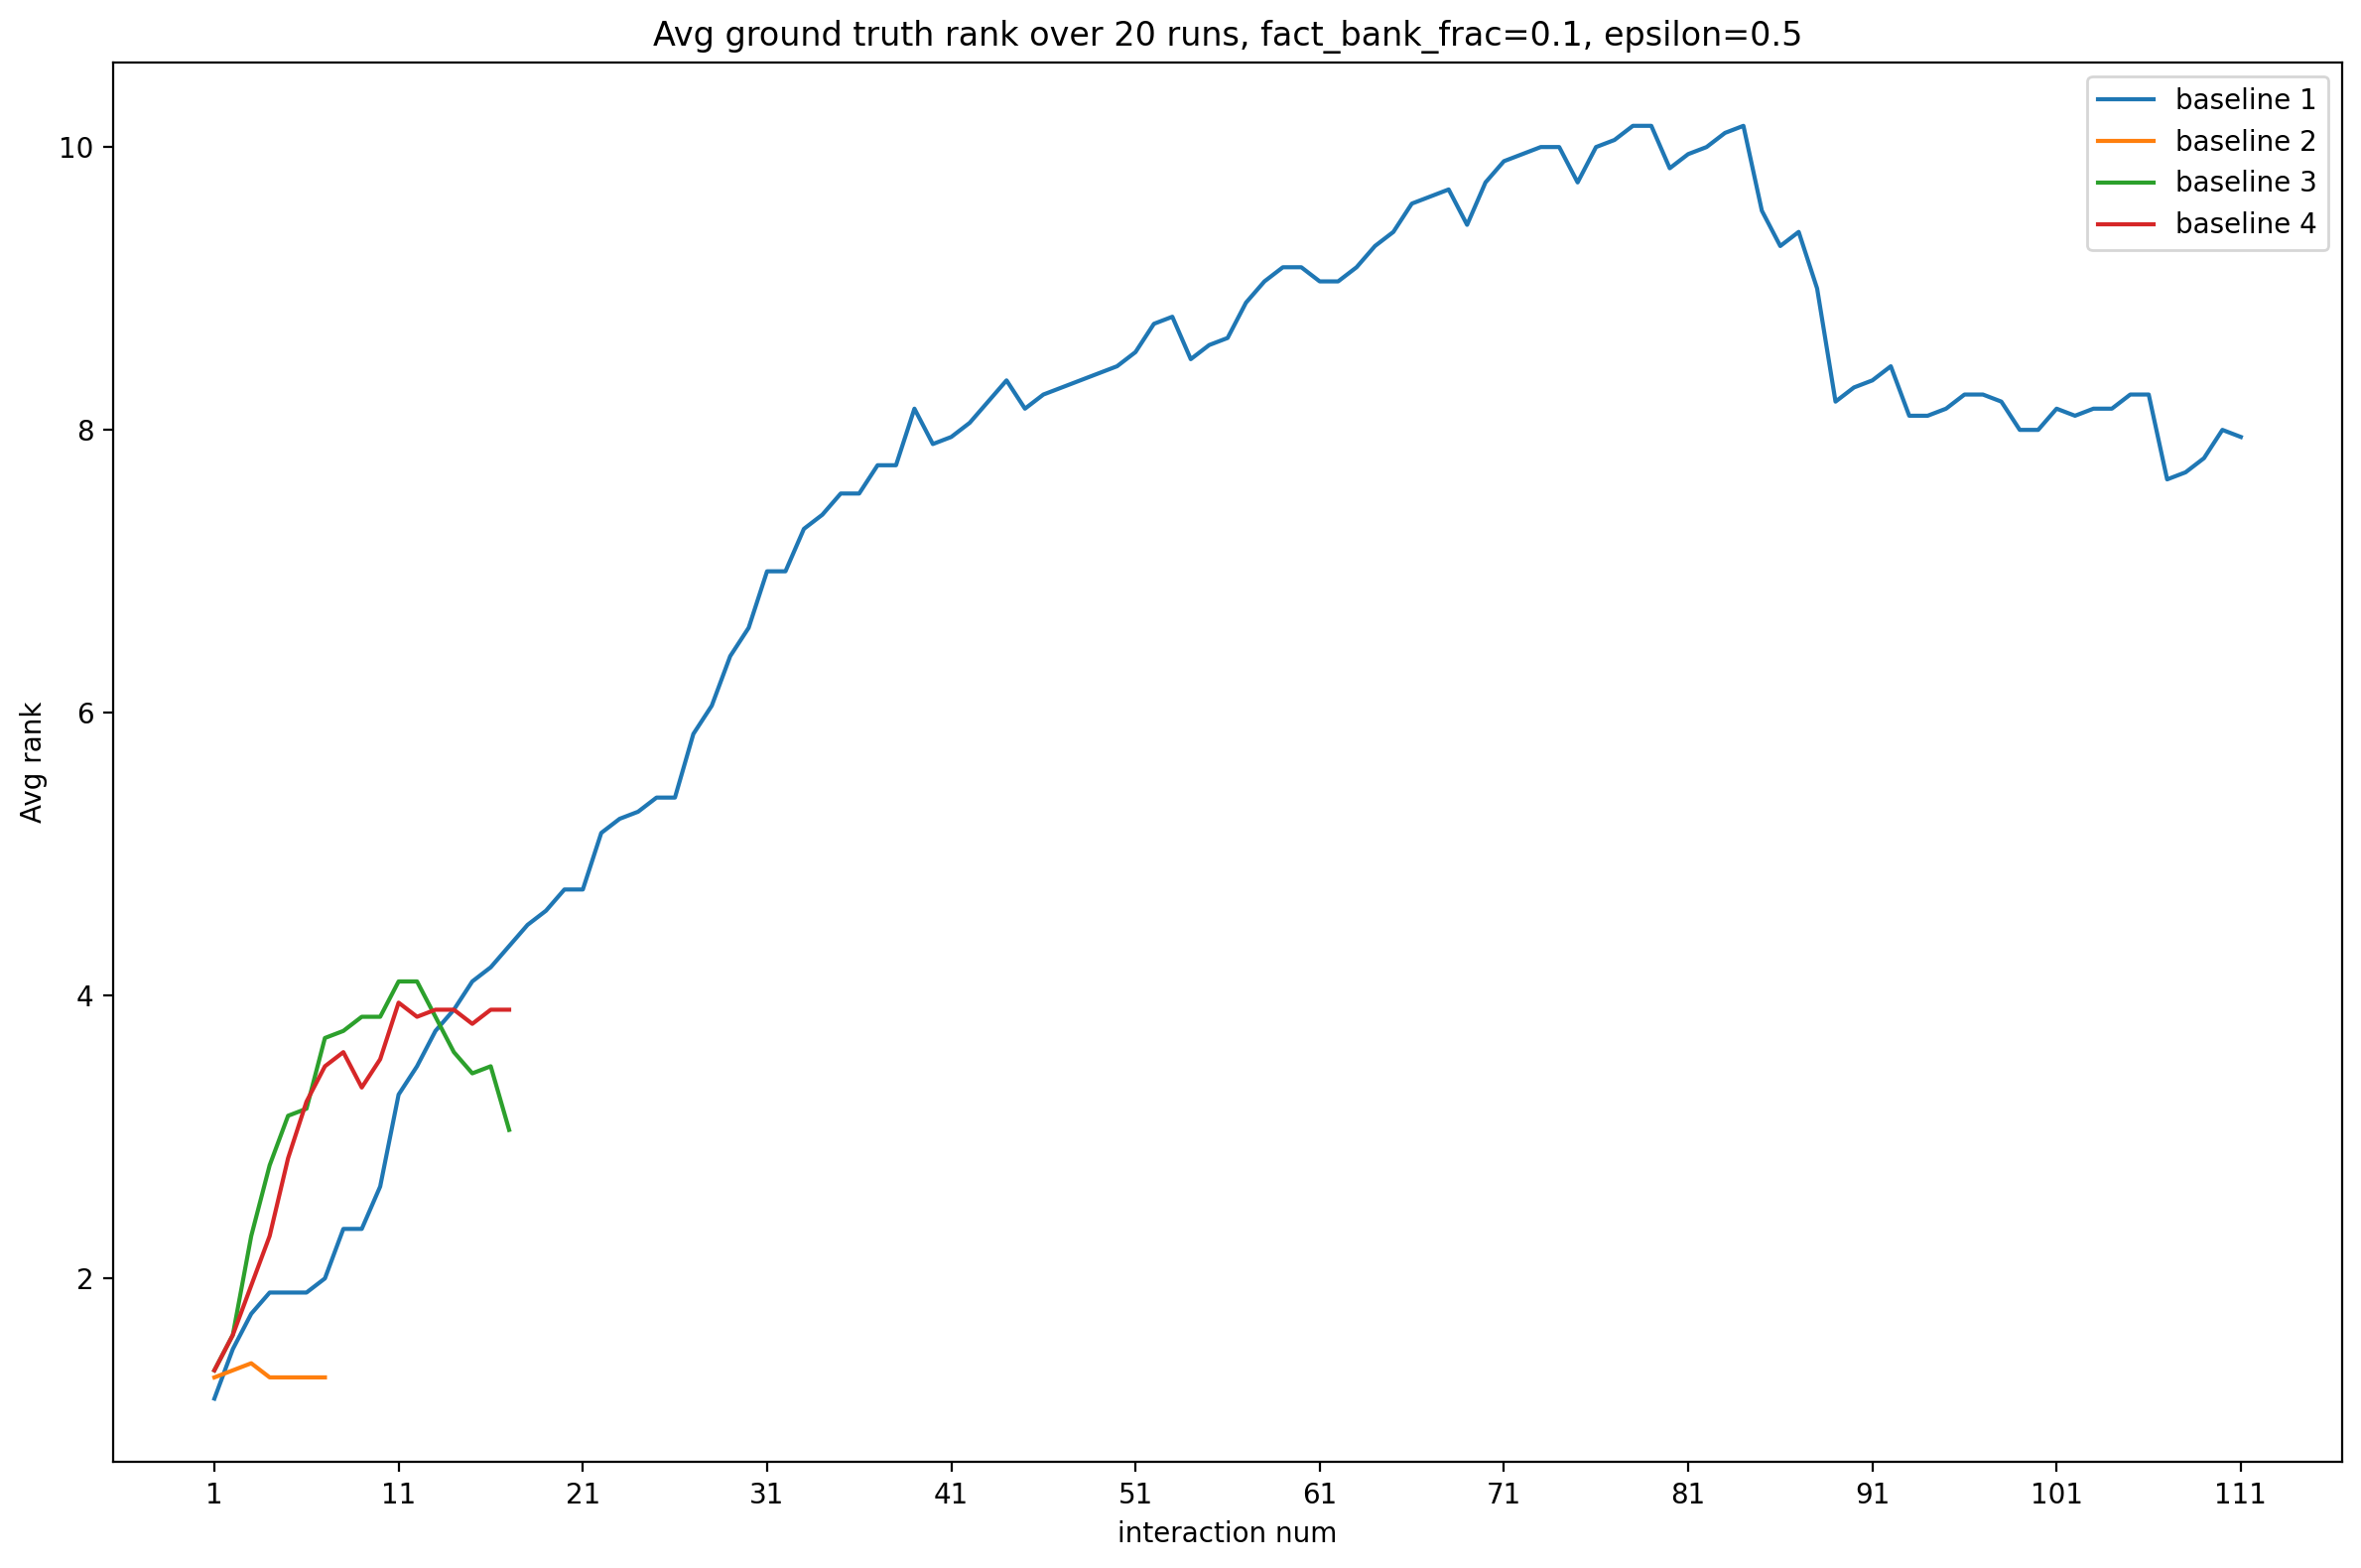

+----------------------+-------------------+--------------------+--------------------+--------------------+
|                      |    baseline 1     |     baseline 2     |     baseline 3     |     baseline 4     |
+----------------------+-------------------+--------------------+--------------------+--------------------+
|      num views       |        105        |         5          |         13         |         13         |
|      4c time(s)      | 96.19283890724182 | 0.4051980972290039 | 0.6976451873779297 | 0.6663432121276855 |
| presentation time(s) | 9.856335031986237 | 0.5457875013351441 | 0.8855685710906982 | 0.9595194697380066 |
+----------------------+-------------------+--------------------+--------------------+--------------------+


In [38]:
labels = ["baseline 1", "baseline 2", "baseline 3", "baseline 4"]

avg_ground_truth_rank_by_baseline = []
avg_time_by_baseline = ["presentation time(s)"]

max_num_interactions = -1
num_runs = 0

fact_bank_frac = 0.1

for i in range(len(labels)):
    dir_path = "./presentation_plots/result" + str(i+1) + "/"
    result_by_fact_bank_frac = np.load(dir_path + "result_by_fact_bank_frac.npy")
    time_by_fact_bank_frac = np.load(dir_path + "time_by_fact_bank_frac.npy")

    fact_bank_frac_index = int(fact_bank_frac*10-1)
    ground_truth_rank_fact_bank_frac = result_by_fact_bank_frac[fact_bank_frac_index]
    avg_ground_truth_rank = np.mean(ground_truth_rank_fact_bank_frac, axis=0)
    avg_ground_truth_rank_by_baseline.append(avg_ground_truth_rank)

    time_fact_bank_frac = time_by_fact_bank_frac[fact_bank_frac_index]
    avg_time = np.mean(time_fact_bank_frac, axis=0)
    avg_time_by_baseline.append(avg_time)

    if avg_ground_truth_rank.size > max_num_interactions:
        max_num_interactions = avg_ground_truth_rank.size

    num_runs = ground_truth_rank_fact_bank_frac.shape[0]

x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_baseline[i]
    if y.size < max_num_interactions:
        y = np.concatenate((y, np.full(max_num_interactions - y.size, np.nan)))
    ax.plot(x_axis, y, label=labels[i])
ax.legend()
ax.set_title("Avg ground truth rank over " + str(num_runs) + " runs, fact_bank_frac=" + str(fact_bank_frac) + ", epsilon=0.5")
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./presentation_plots/avg_rank_fact_bank_frac")
plt.close(fig)

# 4C --- 96.19283890724182 seconds ---
# 4C --- 0.4051980972290039 seconds ---
# 4C --- 0.6976451873779297 seconds ---
# 4C --- 0.6663432121276855 seconds ---
from tabulate import tabulate
time_4c = ["4c time(s)", 96.19283890724182, 0.4051980972290039, 0.6976451873779297, 0.6663432121276855]
size = ["num views", 105, 5, 13, 13]
table = [size, time_4c, avg_time_by_baseline]
print(tabulate(table, [""] + labels, tablefmt="pretty"))

Uncertainty framework

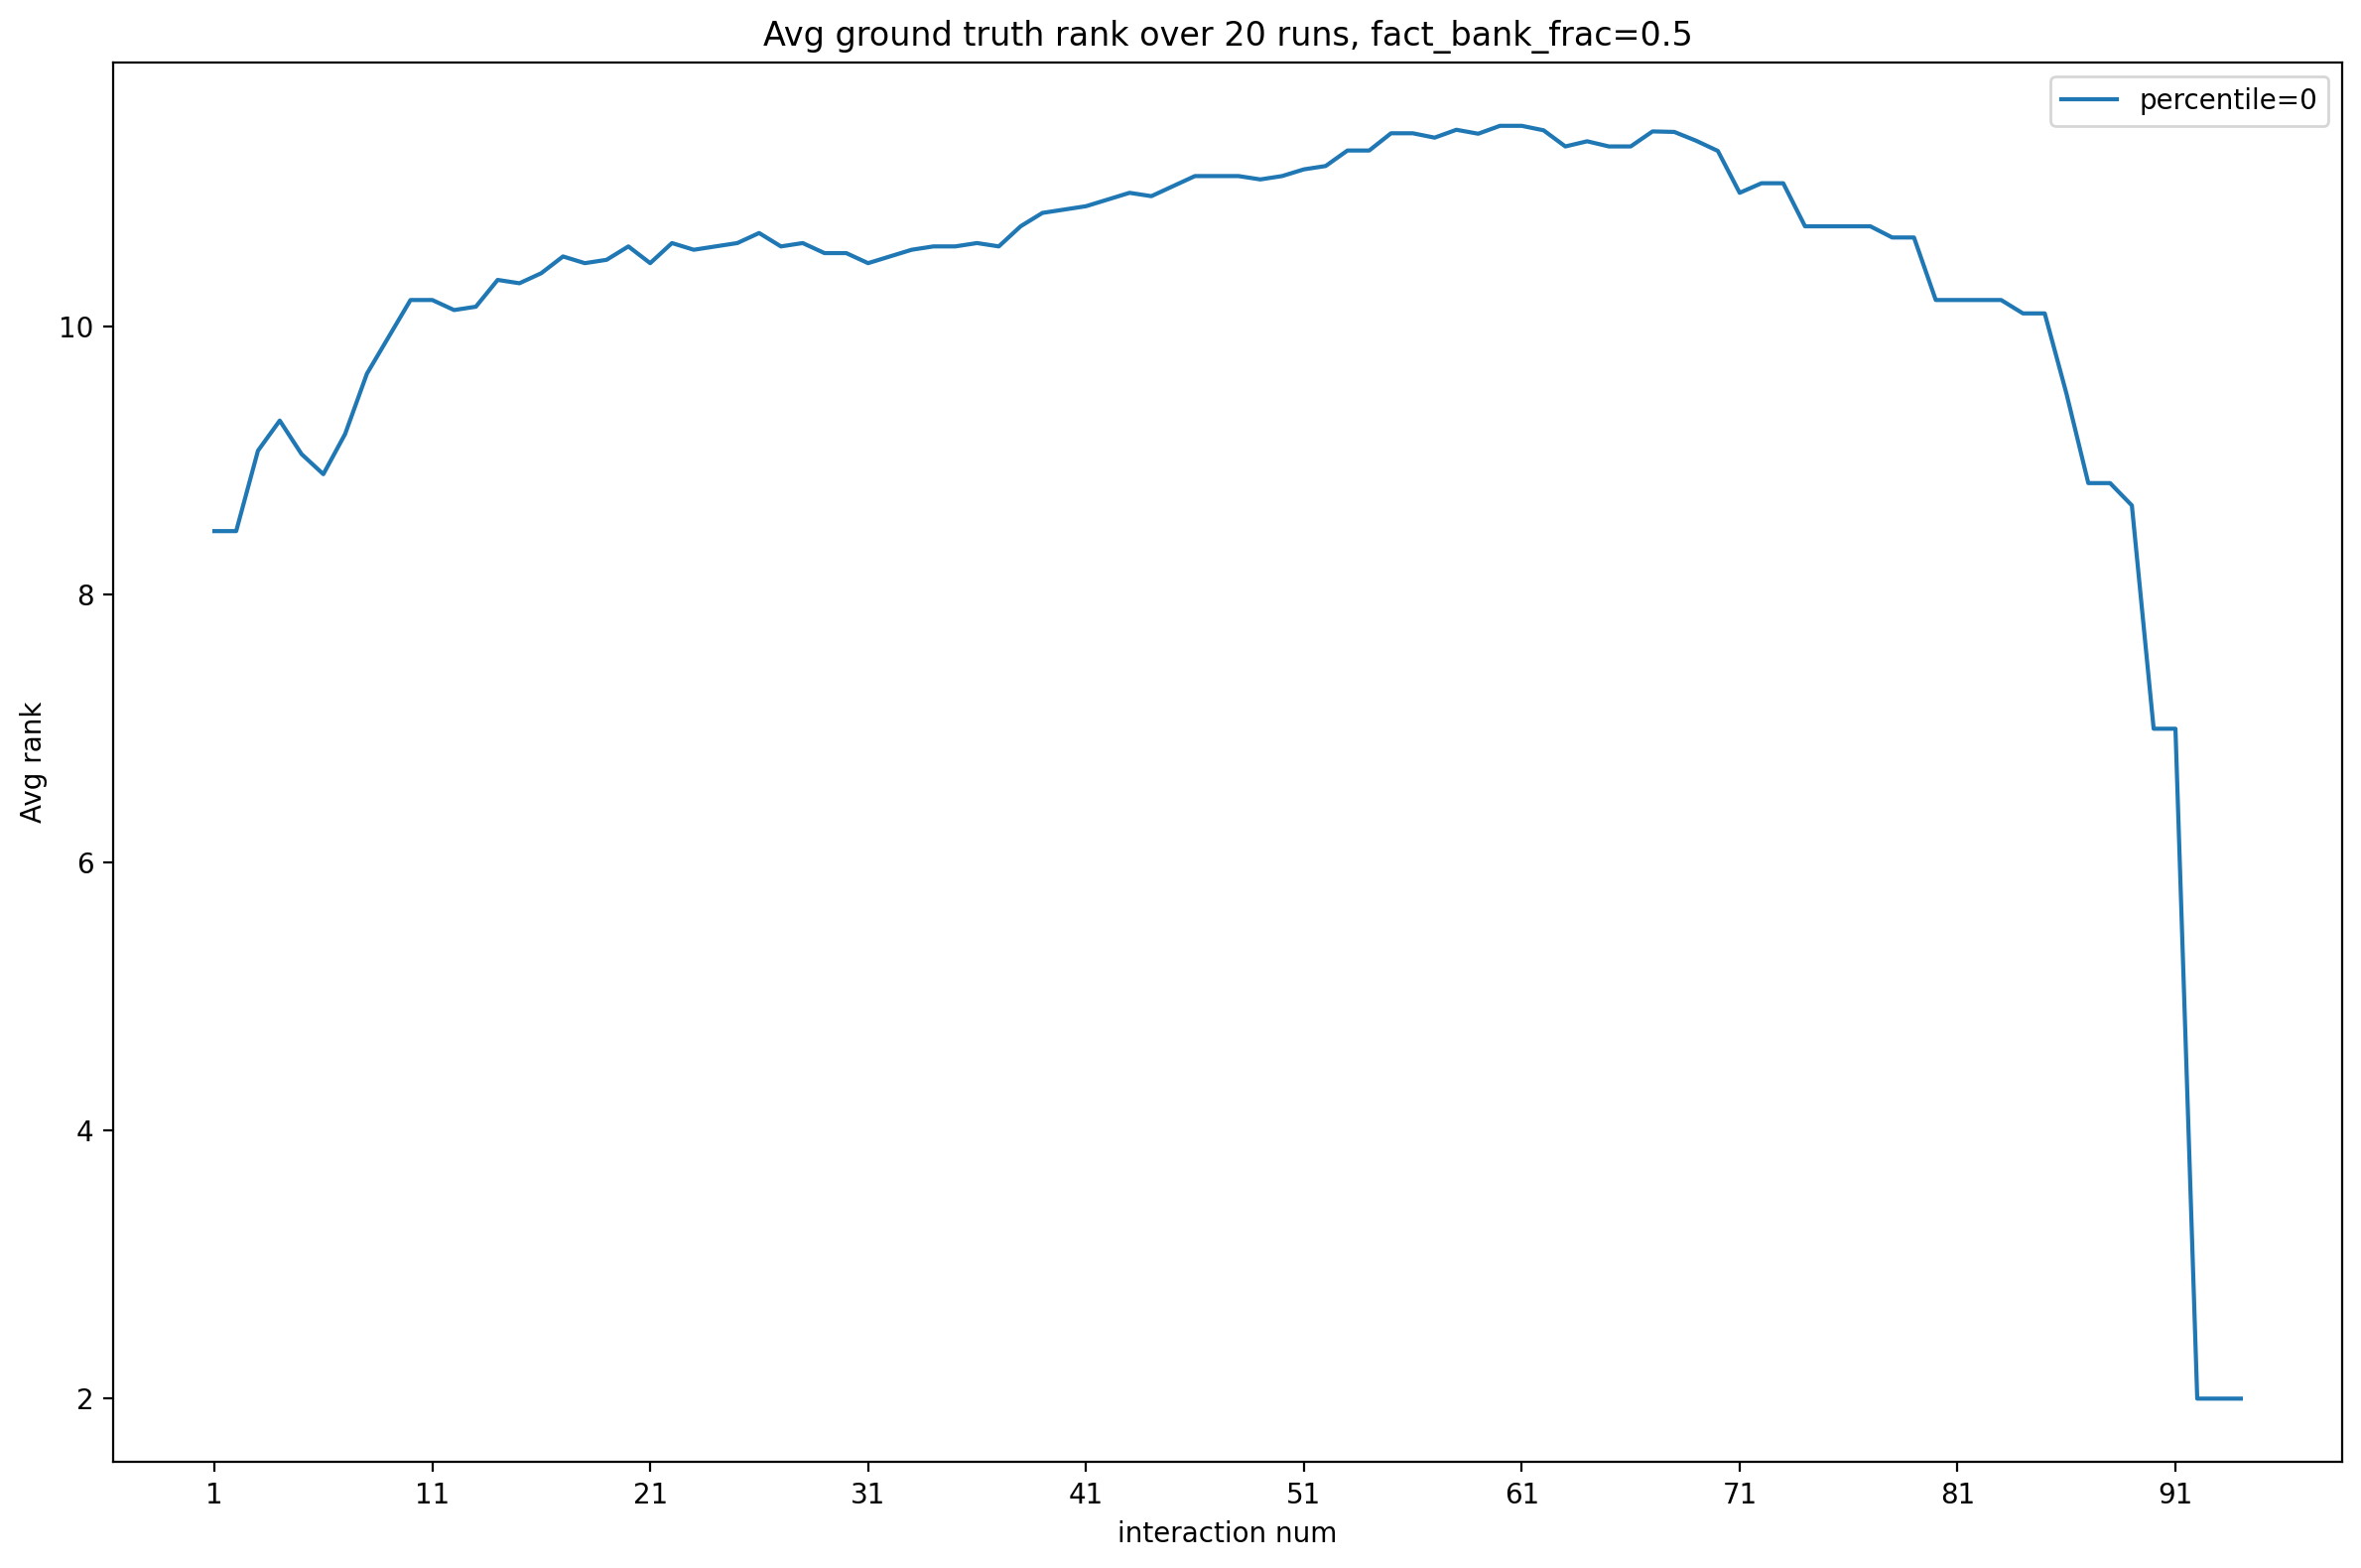

In [14]:
labels = ["percentile=0", "percentile=25", "percentile=50", "percentile=75", "percentile=100"]

fact_bank_frac = 0.5
result_by_top_percentile = np.load("./result_uncertainty/1/result_by_top_percentile.npy")
# print(result_by_top_percentile)
avg_ground_truth_rank_by_percentile = []
num_runs = 0

import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')

for i in range(len(labels)):
    ground_truth_rank = result_by_top_percentile[i]
    # print(ground_truth_rank)
    # print("-----------------------------------------")
    avg_ground_truth_rank = np.nanmean(ground_truth_rank, axis=0)
    avg_ground_truth_rank_by_percentile.append(avg_ground_truth_rank)
    # print(avg_ground_truth_rank)
    # print("-----------------------------------------")

    num_runs = ground_truth_rank.shape[0]

max_num_interactions = avg_ground_truth_rank_by_percentile[0].size
x_axis = np.linspace(1, max_num_interactions, num=max_num_interactions)

fig, ax = plt.subplots()
for i in range(len(labels)):
    y = avg_ground_truth_rank_by_percentile[i]
    if labels[i] == "percentile=100":
        ax.plot(x_axis, y, '-o', label=labels[i])
    else:
        ax.plot(x_axis, y, label=labels[i])

ax.legend()
ax.set_title("Avg ground truth rank over " + str(num_runs) + " runs, fact_bank_frac=" + str(fact_bank_frac))
ax.set_xticks(x_axis[::10])
ax.set_xlabel("interaction num")
ax.set_ylabel("Avg rank")
fig.tight_layout()
plt.show()
fig.savefig("./result_uncertainty/1/avg_rank")
plt.close(fig)